In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('/content/Electronics_Sales_Data.csv')
data

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0
...,...,...,...,...,...,...,...,...,...
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [4]:
data.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


In [5]:
data.shape

(9000, 9)

In [6]:
data.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [7]:
data.duplicated().sum()

0

# **Drop The Column of ProductID**

In [8]:
data2 = data.drop(["ProductID"],axis=1)
data2

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,Tablets,Samsung,2606.718293,63,0,1,5,1
3,Smartphones,Samsung,870.395450,63,1,10,3,1
4,Tablets,Sony,1798.955875,57,0,17,3,0
...,...,...,...,...,...,...,...,...
8995,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,Tablets,HP,1490.453964,38,0,4,2,1


# **Creating Bins & Labels of Columns ProductPrice and CustomerAge**

In [9]:
price_bins = [1, 200, 500, 1000, float('inf')]
price_labels = ['1-200', '200-500', '500-1000', '1000+']
age_bins = [0, 20, 50, float('inf')]
age_labels = ['0-20', '20-50', '50+']

# Bin the data
data2['Price_Range'] = pd.cut(data2['ProductPrice'], bins=price_bins, labels=price_labels, right=False)
data2['AgeRange'] = pd.cut(data2['CustomerAge'], bins=age_bins, labels=age_labels, right=False)


In [10]:
category_counts = data2['ProductCategory'].value_counts()
category_counts

ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64

**We have 5 Products Categories.**

**1)** Smart Phones

**2)** Smart Watches

**3)** Tablets

**4)** Laptops

**5)** Head Phones

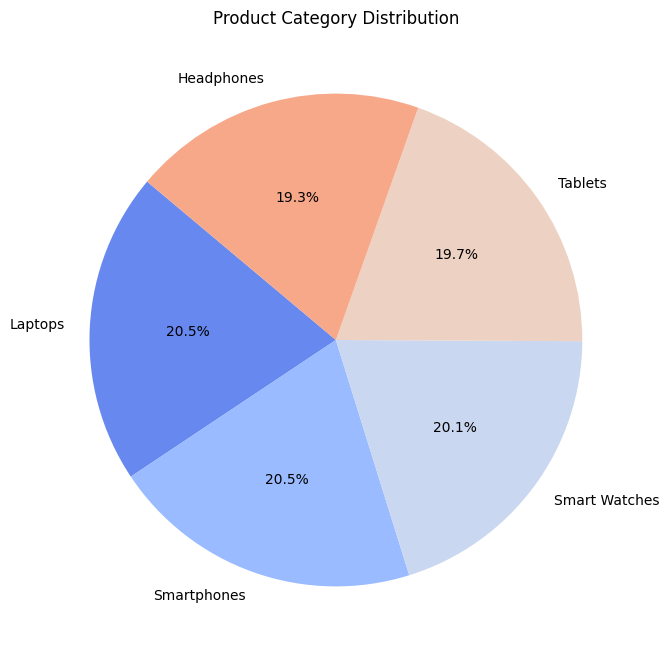

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
plt.title('Product Category Distribution')
plt.show()

<ipython-input-12-e508b70fa287>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data2,x='ProductBrand',palette='viridis',edgecolor='black')


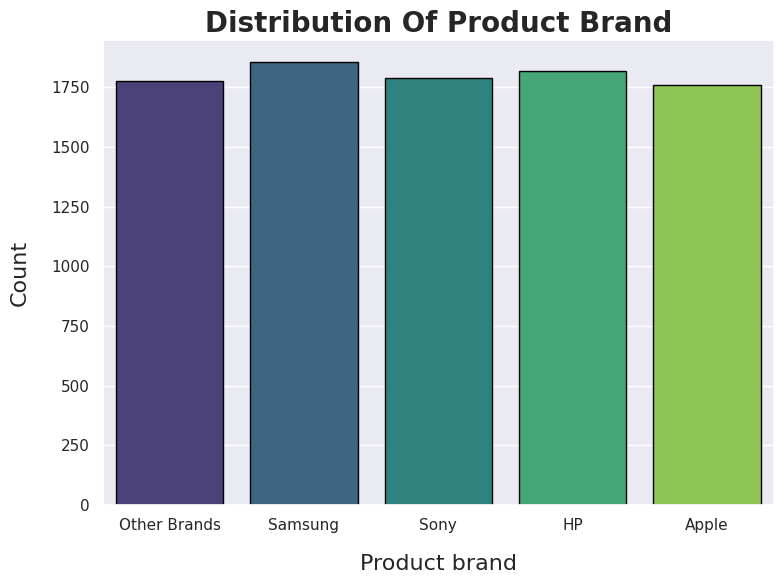

In [12]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.countplot(data=data2,x='ProductBrand',palette='viridis',edgecolor='black')
plt.title('Distribution Of Product Brand', fontsize=20, fontweight='bold')
plt.xlabel('Product brand',fontsize=16,labelpad=15)
plt.ylabel('Count',fontsize=16,labelpad=15)
plt.tight_layout()
plt.show()

# According to the visualization of brands, we can see that:

**1.**   Samsung

**2.**   HP

**3.**   Sony

**4.**   Other Brands

**5.**   Apple





<ipython-input-13-f9ba061b2480>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data2,x='Price_Range',palette='coolwarm',edgecolor='black')


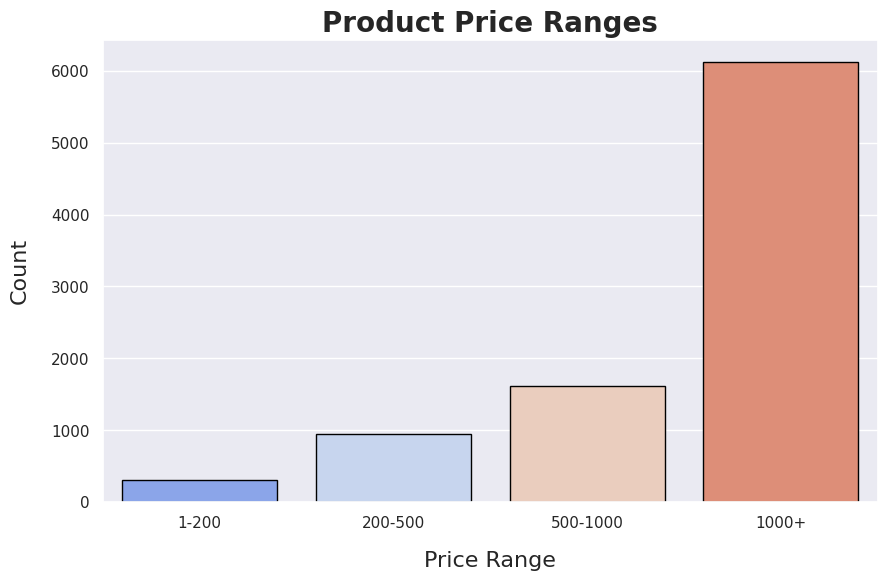

In [13]:
plt.figure(figsize=(10,6))

sns.set(style='darkgrid')
sns.countplot(data=data2,x='Price_Range',palette='coolwarm',edgecolor='black')
plt.title('Product Price Ranges',fontsize=20,fontweight='bold')
plt.xlabel('Price Range',fontsize=16,labelpad=15)
plt.ylabel('Count',fontsize=16,labelpad=15)
plt.show()

# **According to the visualization, we can see that most of the customers have a price range of 1000+**



<ipython-input-14-901c1747a3dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data2,x='AgeRange',palette='viridis',edgecolor='black')


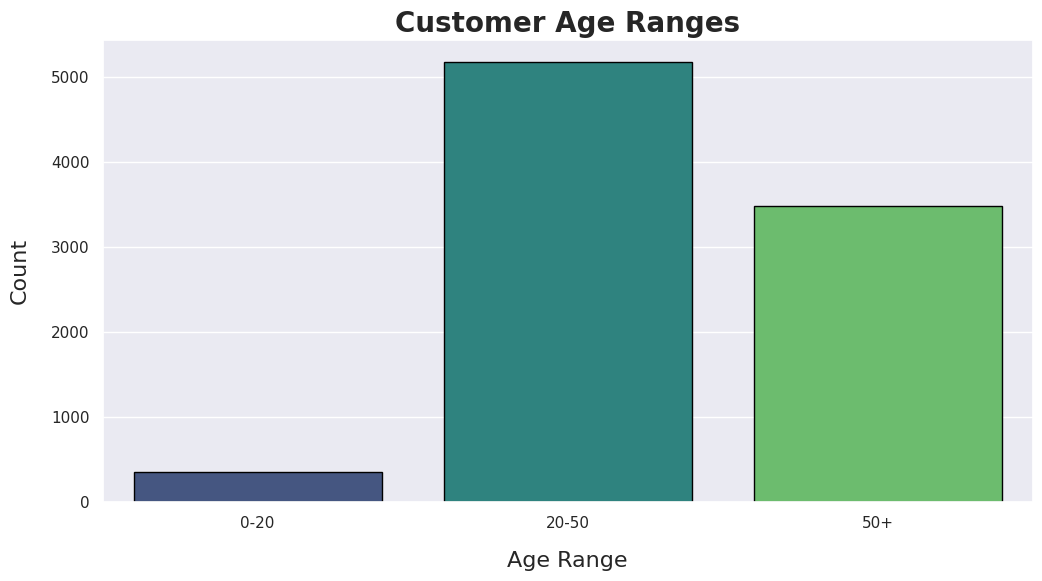

In [14]:
plt.figure(figsize=(12,6))

sns.set(style='darkgrid')
sns.countplot(data=data2,x='AgeRange',palette='viridis',edgecolor='black')
plt.title('Customer Age Ranges',fontsize=20,fontweight='bold')
plt.xlabel('Age Range',fontsize=16,labelpad=15)
plt.ylabel('Count',fontsize=16,labelpad=15)
plt.show()

# **We have a larger number of customers in the age range of 20 t0 50**



<ipython-input-15-b3e03956598c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis', edgecolor='black')


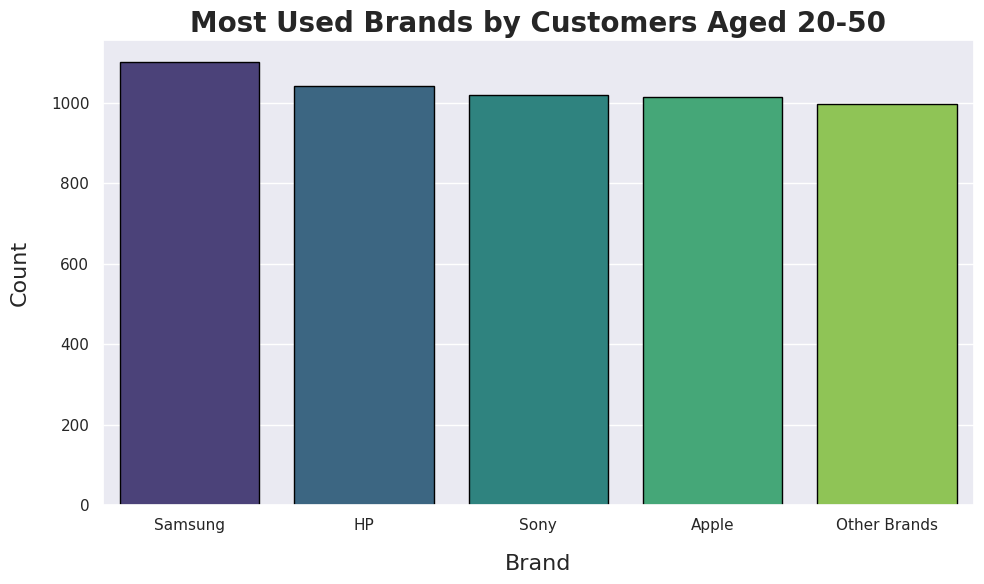

In [15]:
age_filtered = data2[data2['AgeRange'] == '20-50']

brand_counts = age_filtered['ProductBrand'].value_counts()

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis', edgecolor='black')

plt.title('Most Used Brands by Customers Aged 20-50', fontsize=20, fontweight='bold')
plt.xlabel('Brand', fontsize=16, labelpad=15)
plt.ylabel('Count', fontsize=16, labelpad=15)


plt.tight_layout()
plt.show()

# **In the above visualization, we can see that the most selling brands among customers aged 20-50 are Samsung & HP.**

# **Apply label Encoding on categorical variables**

In [16]:
# We start with encoding categorical variables
le_category = LabelEncoder()
data2['ProductCategory'] = le_category.fit_transform(data2['ProductCategory'])

le_brand = LabelEncoder()
data2['ProductBrand'] = le_brand.fit_transform(data2['ProductBrand'])

le_price_range = LabelEncoder()
data2['Price_Range'] = le_price_range.fit_transform(data2['Price_Range'])


# **Feature & Target Selection**

In [17]:
#features and target selection
features = data2[['CustomerAge', 'Price_Range']]
target_category = data2['ProductCategory']
target_brand = data2['ProductBrand']

# **Splitting the Data**

In [18]:
# Split the data
X_train_category, X_test_category, y_train_category, y_test_category = train_test_split(features, target_category, test_size=0.2, random_state=42)
X_train_brand, X_test_brand, y_train_brand, y_test_brand = train_test_split(features, target_brand, test_size=0.2, random_state=42)

# ***Train the Model For Product Category & Product Brand***

In [19]:
# Train the model for ProductCategory
train_category = RandomForestClassifier(random_state=42)
train_category.fit(X_train_category, y_train_category)

# Train the model for ProductBrand
train_brand = RandomForestClassifier(random_state=42)
train_brand.fit(X_train_brand, y_train_brand)

RandomForestClassifier(random_state=42)

In [20]:
# Predicting
def predict_category_brand(age, price_range):
    price_range_encoded = le_price_range.transform([price_range])[0]
    features = np.array([[age, price_range_encoded]])
    predicted_category = train_category.predict(features)
    predicted_brand = train_brand.predict(features)
    return le_category.inverse_transform(predicted_category)[0], le_brand.inverse_transform(predicted_brand)[0]

In [21]:
# Test prediction
age = 40
price_range = '1000+'  #['1-200', '200-500', '500-1000', '1000+']
predicted_category, predicted_brand = predict_category_brand(age, price_range)
print(f"Predicted Product Category: {predicted_category}")
print(f"Predicted Product Brand: {predicted_brand}")

Predicted Product Category: Tablets
Predicted Product Brand: HP


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
